In [127]:
from skimage import io

from skimage.filters import roberts, scharr, prewitt, sobel, hessian, frangi, sato, threshold_yen
from skimage.transform import rescale, resize, downscale_local_mean
from skimage.exposure import equalize_hist
from skimage.measure import label, regionprops, regionprops_table
from skimage.morphology import erosion, dilation
from skimage.feature import greycomatrix, greycoprops

from matplotlib import pyplot as plt

import os
import numpy as np
import pandas as pd

from skimage.filters import gaussian


from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

import os
import glob
import math

import statistics
from scipy.stats import mannwhitneyu, f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd



In [104]:
def lines(path, store, threshold=0.02):
    length = len(os.listdir(path))
    i=0 
    for image_path in os.listdir(path):
        if not image_path.startswith('.'):
            i = i+1
            print(f"{i} of {length-1}") #path: {path}, type: {store}")
            input_path = os.path.join(path, image_path)
            img = io.imread(input_path, as_gray=True)
            img = resize(img, (512, 256))
            imagewt = sato(img, mode='constant')
            number = np.sum(imagewt>threshold)
            name = image_path
            store[name] = number
            
            
def pvalues(a, b, c):
    F, p = f_oneway(a, b, c)
    print('Statistics=%.3f, p=%.3f' % (F, p))
    scores = a + b + c
    group = []
    for i in range(len(a)):
        group.append('WT')
    for i in range(len(b)):
        group.append('Het')
    for i in range(len(c)):
        group.append('Homo')
    df = pd.DataFrame({'score': scores, 'group': group})
    tukey = pairwise_tukeyhsd(endog=df['score'],
                             groups=df['group'],
                             alpha=0.05)
    print(tukey)  

def plotbox(a, xa, ya, ylabel, alpha=0.5, s=3.5):
    sns.set(style="white")
    boxplot_width = 0.1 # thinner to make room for having swarmplot beside
    swarmplot_offset = -0.5 # offset to left of boxplot
    xlim_offset = -1 # necessary to show leftmost swarmplot  
    colours = ['lightskyblue','coral', 'dimgrey']
    #fig = plt.figure(figsize=(6,4))

    ax = sns.swarmplot(x=xa, y=ya, data=a, palette=colours, alpha=alpha, s=s)

    path_collections = [child for child in ax.get_children() 
                        if isinstance(child,matplotlib.collections.PathCollection)] 

    for path_collection in path_collections: 
        x,y = np.array(path_collection.get_offsets()).T 
        xnew = x + swarmplot_offset
        offsets = list(zip(xnew,y)) 
        path_collection.set_offsets(offsets)

    sns.boxplot(x=xa, y=ya, data=a, width=boxplot_width, ax=ax, palette=colours) 
    def change_width(ax, new_value):
        for patch in ax.patches:
            current_width = patch.get_width()
            diff = current_width - new_value
            # change patch width
            patch.set_width(new_value)
            # re-center patch
            patch.set_x(patch.get_x() + diff * .5)
    change_width(ax,.25)
    plt.xticks([0, 1.1, 2.3], ['Wild Type', 'Heterozygous', 'Homozygous or \ncompound het'])
    ax.set_xticklabels(ax.get_xticklabels(), ha="right") # align labels to left
    ax.set_xlim(xlim_offset,ax.get_xlim()[1]) # to show leftmost swarmplot
    ax.set_xlabel('Filaggrin gene mutation status', fontsize=14)
    ax.set_ylabel(ylabel, fontsize=14)
    ax.yaxis.set_major_formatter(matplotlib.ticker.StrMethodFormatter('{x:,.0f}'))
    #plt.xticks([1, 2, 3], ['WT', '+/-', '-/-'])

###COMPARISON 0 AND 1
def addstats(result01, result12, result02, ymax):
    x1, x2 = 0, 1   # columns 'Sat' and 'Sun' (first column: 0, see plt.xticks())
    y = a[ya].max() + (a[ya].max() * 0.05 )
    h = 2
    col = 'k'

    plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
    plt.text((x1+x2)*.5, y+h, result01, ha='center', va='bottom', color=col)
    ###COMPARISON 1 AND 2
    x1, x2 = 1, 2   # columns 'Sat' and 'Sun' (first column: 0, see plt.xticks())


    y = a[ya].max() + (a[ya].max() * 0.1 )
    plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
    plt.text((x1+x2)*.5, y+h, result12, ha='center', va='bottom', color=col)

    ###COMPARISON 0 AND 1
    x1, x2 = 0, 2   # columns 'Sat' and 'Sun' (first column: 0, see plt.xticks())


    y = a[ya].max() + (a[ya].max() * 0.18 )

    plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
    plt.text((x1+x2)*.5, y+h, result02, ha='center', va='bottom', color=col)
    
def countimages(path):
    i=0
    for fname in os.listdir(path):
        if not fname.startswith('.'):
            i=i+1
            #print(fname)
    print(f"Image count for {path}: {i}")
    return i



In [128]:
"""
PATHS
"""

base_dir = '/Users/L/Downloads/palmarhyperlinearity/'
base_dir_thenar = '/Users/L/Downloads/palmarhyperlinearity/thenarversionall2/'
base_dir_p = '/Users/L/Downloads/palmarhyperlinearity/palmarversionall2/'

path_thenar_wt = os.path.join(base_dir_thenar, 'wtupdated')
path_thenar_het = os.path.join(base_dir_thenar, 'het')
path_thenar_homo = os.path.join(base_dir_thenar, 'homo')

path_palm_wt = os.path.join(base_dir_p, 'wt')
path_palm_het = os.path.join(base_dir_p, 'het')
path_palm_homo = os.path.join(base_dir_p, 'homo')

countimages(path_thenar_wt) 
 
countimages(path_thenar_het) 
 
countimages(path_thenar_homo) 
 

countimages(path_palm_wt)
countimages(path_palm_het)
countimages(path_palm_homo)

print(f" total image count = {countimages(path_palm_wt) + countimages(path_palm_het) + countimages(path_palm_homo)}")


Image count for /Users/L/Downloads/palmarhyperlinearity/thenarversionall2/wtupdated: 324
Image count for /Users/L/Downloads/palmarhyperlinearity/thenarversionall2/het: 179
Image count for /Users/L/Downloads/palmarhyperlinearity/thenarversionall2/homo: 28
Image count for /Users/L/Downloads/palmarhyperlinearity/palmarversionall2/wt: 324
Image count for /Users/L/Downloads/palmarhyperlinearity/palmarversionall2/het: 179
Image count for /Users/L/Downloads/palmarhyperlinearity/palmarversionall2/homo: 28
Image count for /Users/L/Downloads/palmarhyperlinearity/palmarversionall2/wt: 324
Image count for /Users/L/Downloads/palmarhyperlinearity/palmarversionall2/het: 179
Image count for /Users/L/Downloads/palmarhyperlinearity/palmarversionall2/homo: 28
 total image count = 531


In [20]:
"""
T0.02 - score generation
"""
thres = 0.02

thenar_wt_scores= {}
thenar_het_scores= {}
thenar_homo_scores= {}

lines(path_thenar_wt, thenar_wt_scores, thres)
lines(path_thenar_het, thenar_het_scores, thres) 
lines(path_thenar_homo, thenar_homo_scores, thres)

"""
P0.02 - score generation
"""
thres=0.02

palmwtscores= {} 
palmhetscores= {}
palmhomoscores= {}

lines(path_palm_wt, palmwtscores, thres)
lines(path_palm_het, palmhetscores, thres)
lines(path_palm_homo, palmhomoscores, thres)

print("done palm 0.02")



1 of 324
2 of 324
3 of 324
4 of 324
5 of 324
6 of 324
7 of 324
8 of 324
9 of 324
10 of 324
11 of 324
12 of 324
13 of 324
14 of 324
15 of 324
16 of 324
17 of 324
18 of 324
19 of 324
20 of 324
21 of 324
22 of 324
23 of 324
24 of 324
25 of 324
26 of 324
27 of 324
28 of 324
29 of 324
30 of 324
31 of 324
32 of 324
33 of 324
34 of 324
35 of 324
36 of 324
37 of 324
38 of 324
39 of 324
40 of 324
41 of 324
42 of 324
43 of 324
44 of 324
45 of 324
46 of 324
47 of 324
48 of 324
49 of 324
50 of 324
51 of 324
52 of 324
53 of 324
54 of 324
55 of 324
56 of 324
57 of 324
58 of 324
59 of 324
60 of 324
61 of 324
62 of 324
63 of 324
64 of 324
65 of 324
66 of 324
67 of 324
68 of 324
69 of 324
70 of 324
71 of 324
72 of 324
73 of 324
74 of 324
75 of 324
76 of 324
77 of 324
78 of 324
79 of 324
80 of 324
81 of 324
82 of 324
83 of 324
84 of 324
85 of 324
86 of 324
87 of 324
88 of 324
89 of 324
90 of 324
91 of 324
92 of 324
93 of 324
94 of 324
95 of 324
96 of 324
97 of 324
98 of 324
99 of 324
100 of 324
101 of 3

251 of 324
252 of 324
253 of 324
254 of 324
255 of 324
256 of 324
257 of 324
258 of 324
259 of 324
260 of 324
261 of 324
262 of 324
263 of 324
264 of 324
265 of 324
266 of 324
267 of 324
268 of 324
269 of 324
270 of 324
271 of 324
272 of 324
273 of 324
274 of 324
275 of 324
276 of 324
277 of 324
278 of 324
279 of 324
280 of 324
281 of 324
282 of 324
283 of 324
284 of 324
285 of 324
286 of 324
287 of 324
288 of 324
289 of 324
290 of 324
291 of 324
292 of 324
293 of 324
294 of 324
295 of 324
296 of 324
297 of 324
298 of 324
299 of 324
300 of 324
301 of 324
302 of 324
303 of 324
304 of 324
305 of 324
306 of 324
307 of 324
308 of 324
309 of 324
310 of 324
311 of 324
312 of 324
313 of 324
314 of 324
315 of 324
316 of 324
317 of 324
318 of 324
319 of 324
320 of 324
321 of 324
322 of 324
323 of 324
324 of 324
1 of 179
2 of 179
3 of 179
4 of 179
5 of 179
6 of 179
7 of 179
8 of 179
9 of 179
10 of 179
11 of 179
12 of 179
13 of 179
14 of 179
15 of 179
16 of 179
17 of 179
18 of 179
19 of 179
20 of

'\n\n#T0.01 - score generation\n\n\n\nthres = 0.01\n\nwtscores1= {}\nhetscores1= {}\nhomoscores1= {}\n\nlines(path_thenar_wt, wtscores1, thres)\nlines(path_thenar_het, hetscores1, thres) \nlines(path_thenar_homo, homoscores1, thres)\n\n\n#P0.01 - score generation\n\n\nthres=0.01\n\npalmwtscores1= {} \npalmhomoscores1= {}\npalmhetscores1= {}\n\nlines(path_palm_wt, palmwtscores1, thres)\nlines(path_palm_het, palmhetscores1, thres)\nlines(path_palm_homo , palmhomoscores1, thres)\n\n'

In [24]:
"""
T0.02 - dataframe
"""

thenarwtdf = pd.DataFrame.from_dict(thenar_wt_scores, orient="index")
thenarwtdf['ID'] = thenarwtdf.index
thenarwtdf = thenarwtdf.assign(FLGstatus = 0)

thenarhetdf = pd.DataFrame.from_dict(thenar_het_scores, orient="index")
thenarhetdf['ID'] = thenarhetdf.index
thenarhetdf = thenarhetdf.assign(FLGstatus = 1)

thenarhomodf = pd.DataFrame.from_dict(thenar_homo_scores, orient="index")
thenarhomodf['ID'] = thenarhomodf.index
thenarhomodf = thenarhomodf.assign(FLGstatus = 2)




thenarscoresalldf = pd.concat([thenarwtdf, thenarhetdf, thenarhomodf])
thenarscoresalldf.set_index(['ID'])
thenarscoresalldf.columns = ['Thenar scores', 'ID', 'FLG status']

thenarscoresalldf.head()

thenarscoresalldf.to_csv("thenarscoresalldf.csv")

list_thenar_wt_scores = list(thenar_wt_scores.values())
list_thenar_het_scores  = list(thenar_het_scores.values())
list_thenar_homo_scores  = list(thenar_homo_scores.values())

pvalues(list_thenar_wt_scores , list_thenar_het_scores, list_thenar_homo_scores)

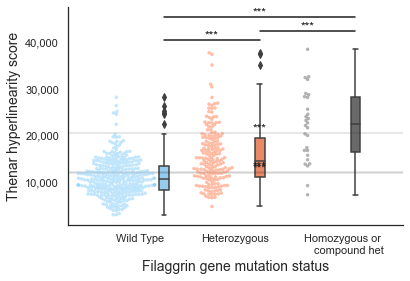

In [28]:
"""
T0.02 - figure
"""

a = pd.read_csv("thenarscoresalldf.csv")
ylab = 'Thenar hyperlinearity score'

ya="Thenar scores"
result01 = "***"
result12 = "***"
result02 = "***"

plotbox(a=a, xa="FLG status", ya=ya, ylabel=ylab, alpha=0.5, s=3.5)
ymax = a[ya].max()
addstats(result01, result12, result02, ymax)
#plt.title('Thenar dataset')

#####add in scores from other images
x1, x2 = -1, 3   # columns 'Sat' and 'Sun' (first column: 0, see plt.xticks())
h = 2
col = 'k'

y = 12214
plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=0.2, c=col)
plt.text((x1+x2)*.5, y+h, result01, ha='center', va='bottom', color=col)

y = 11855
plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=0.2, c=col)
plt.text((x1+x2)*.5, y+h, result01, ha='center', va='bottom', color=col)

y = 20479
plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=0.2, c=col)
plt.text((x1+x2)*.5, y+h, result01, ha='center', va='bottom', color=col)


sns.despine()
plt.show()





In [26]:
st_dev = statistics.pstdev(list_thenar_wt_scores)
print(statistics.mean(list_thenar_wt_scores))
print("Standard deviation of the thenar wt 0.02: " + str(st_dev))
print(" ")

print(statistics.mean(list_thenar_het_scores))
st_dev = statistics.pstdev(list_thenar_het_scores)
print("Standard deviation of the thenar -/+ 0.02: " + str(st_dev))
print(" ")

print(statistics.mean(list_thenar_homo_scores))
st_dev = statistics.pstdev(list_thenar_homo_scores)
print("Standard deviation of the thenar -/- 0.02: " + str(st_dev))

10997
Standard deviation of the thenar wt 0.02: 4019.333526842479
 
15556
Standard deviation of the thenar -/+ 0.02: 6162.0577731793455
 
22033
Standard deviation of the thenar -/- 0.02: 7477.872090374373


In [108]:
#

In [107]:
#

In [106]:
#

In [109]:
#

In [110]:
#

In [29]:
"""
P0.02 - dataframe generation
"""
palmwtdf = pd.DataFrame.from_dict(palmwtscores, orient="index")
palmwtdf['ID'] = palmwtdf.index
palmwtdf = palmwtdf.assign(FLGstatus = 0)

palmhetdf = pd.DataFrame.from_dict(palmhetscores, orient="index")
palmhetdf['ID'] = palmhetdf.index
palmhetdf = palmhetdf.assign(FLGstatus = 1)

palmhomodf = pd.DataFrame.from_dict(palmhomoscores, orient="index")
palmhomodf['ID'] = palmhomodf.index
palmhomodf = palmhomodf.assign(FLGstatus = 2)




palmalldf = pd.concat([palmwtdf, palmhetdf, palmhomodf])
palmalldf.set_index(['ID'])

palmalldf.columns = ['Palmar scores', 'ID', 'FLG status']

palmalldf.to_csv("palmalldf.csv")
#palmalldf.head()

list_palmwtscores = list(palmwtscores.values())
list_palmhetscores = list(palmhetscores.values())
list_palmhomoscores = list(palmhomoscores.values())
pvalues(list_palmwtscores, list_palmhetscores, list_palmhomoscores)



Statistics=69.427, p=0.000
    Multiple Comparison of Means - Tukey HSD, FWER=0.05     
group1 group2  meandiff  p-adj    lower      upper    reject
------------------------------------------------------------
   Het   Homo  5565.7638 0.001   3185.3715   7946.156   True
   Het     WT -3869.1617 0.001  -4959.9836 -2778.3398   True
  Homo     WT -9434.9255 0.001 -11742.1438 -7127.7071   True
------------------------------------------------------------


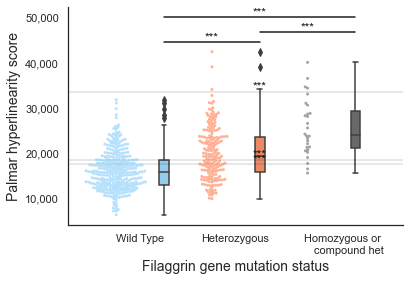

In [30]:
"""
P0.02 - figure
"""

a = pd.read_csv("palmalldf.csv")
ylab = 'Palmar hyperlinearity score'

ya="Palmar scores"
result01 = "***"
result12 = "***"
result02 = "***"
 
plotbox(a=a, xa="FLG status", ya=ya, ylabel=ylab, s=3, alpha=0.6)
ymax = a[ya].max()
addstats(result01, result12, result02, ymax)


######add scores
y = 17584
plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=0.2, c=col)
plt.text((x1+x2)*.5, y+h, result01, ha='center', va='bottom', color=col)

y = 18636
plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=0.2, c=col)
plt.text((x1+x2)*.5, y+h, result01, ha='center', va='bottom', color=col)

y = 33610
plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=0.2, c=col)
plt.text((x1+x2)*.5, y+h, result01, ha='center', va='bottom', color=col)


#plt.title('Palmar dataset')
sns.despine()
plt.show()



In [31]:
print(statistics.mean(list_palmwtscores))
st_dev = statistics.pstdev(list_palmwtscores)
print("Standard deviation of the palm wt 0.02: " + str(st_dev))
print(" ")


print(statistics.mean(list_palmhetscores))
st_dev = statistics.pstdev(list_palmhetscores)
print("Standard deviation of the palm -/+ 0.02: " + str(st_dev))
print(" ")

print(statistics.mean(list_palmhomoscores))
st_dev = statistics.pstdev(list_palmhomoscores)
print("Standard deviation of the palm -/- 0.02: " + str(st_dev))



16307
Standard deviation of the palm wt 0.02: 4292.961099287996
 
20176
Standard deviation of the palm -/+ 0.02: 5825.6999579449675
 
25742
Standard deviation of the palm -/- 0.02: 6170.694126271371


In [112]:
#

Statistics=80.456, p=0.000
     Multiple Comparison of Means - Tukey HSD, FWER=0.05      
group1 group2   meandiff  p-adj    lower       upper    reject
--------------------------------------------------------------
   Het   Homo   8953.2691 0.001   5384.5764  12521.9619   True
   Het     WT  -6320.7067 0.001  -7981.0121  -4660.4013   True
  Homo     WT -15273.9758 0.001 -18729.5392 -11818.4125   True
--------------------------------------------------------------


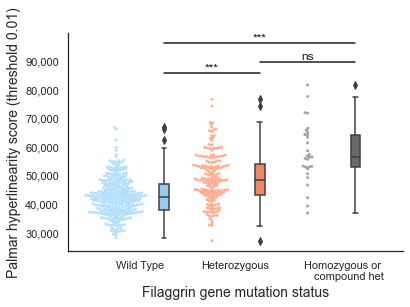

In [49]:
"""
P0.01 - figure
"""
a = list(palmwtscores1.values())
b = list(palmhetscores1.values())
c = list(palmhomoscores1.values())
pvalues(a, b, c)


a = pd.read_csv("palmalldf1.csv")
ylab = 'Palmar hyperlinearity score (threshold 0.01)'

ya="Palmar scores"
result01 = "***"
result12 = "ns"
result02 = "***"
 
plotbox(a=a, xa="FLG status", ya=ya, ylabel=ylab, alpha =0.6, s=3)
ymax = a[ya].max()
addstats(result01, result12, result02, ymax)

#plt.title('Palmar dataset')
sns.despine()
plt.show()



In [113]:
"""
END
"""
 

'\nEND\n'

In [114]:
"""
PHOTOS FOR OUTLIERS
"""
#


'\nPHOTOS FOR OUTLIERS\n'

In [116]:
#

In [117]:
#

In [118]:
#

In [120]:
#

In [119]:
#

In [121]:
#

In [122]:
#

In [123]:
#

In [124]:
#

In [5]:
a = pd.read_csv("thenarscoresalldf.csv")
a = a.sort_values(by=['Thenar scores'], ascending=False)
#a['Unamed: 0'] = a.index
a.head(5)


a = pd.read_csv("palmalldf.csv")
a = a.sort_values(by=['Palmar scores'], ascending=False)

a.tail(5)

,Unnamed: 0,Palmar scores,ID,FLG status
28,439.jpg,7873,439.jpg,0
268,0309 (3).jpg,7615,0309 (3).jpg,0
127,477.jpg,7302,477.jpg,0
206,0337 (12).jpg,7257,0337 (12).jpg,0
221,482.jpg,6456,482.jpg,0


In [ ]:
base_dir_thenar = '/Users/L/Downloads/palmarhyperlinearity/thenarversionall2/'
#base_dir_p = '/Users/L/Downloads/palmarhyperlinearity/palmarversionall2/'
outliers = os.path.join(base_dir_thenar, 'outliers')



In [125]:
i=0

0482 (4).jpg


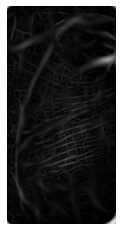

In [126]:
#palm outliers oprint images
outlierspalm = '/Users/L/Downloads/palmarhyperlinearity/thenarversionall2/outliersthenar'
path = outlierspalm
os.chdir(outlierspalm) 
outliers_list = []

for image_path in os.listdir(path):
        if not image_path.startswith('.'):
            outliers_list.append(image_path)
           

    
imageo = outliers_list[i]
print(imageo)
input_path = os.path.join(path, image_path)
img = io.imread(imageo, as_gray=True)
img = resize(img, (512, 256))
imagewt = sato(img, mode='constant')
plt.axis('off') 
plt.imshow(imagewt, cmap='gray')   
i = i + 1



In [26]:
base_dir_thenar = '/Users/L/Downloads/palmarhyperlinearity/thenarversionall2/'
#base_dir_p = '/Users/L/Downloads/palmarhyperlinearity/palmarversionall2/'
outlierslow = os.path.join(base_dir_thenar, 'outlierslow')
a.tail(1)


,Unnamed: 0,Palmar scores,ID,FLG status
221,482.jpg,6456,482.jpg,0


In [90]:
i=0

0482 (4).jpg


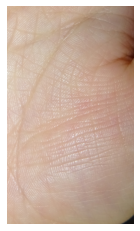

In [60]:
imageo = outliers_list[i]
print(imageo)
input_path = os.path.join(path, image_path)
img = io.imread(imageo, as_gray=False)
#img = resize(img, (512, 256))
imagewt = img
plt.axis('off') 
plt.imshow(imagewt, cmap='gray')   
i = i + 1



In [77]:
#palm outliers oprint images
outlierspalm = '/Users/L/Downloads/palmarhyperlinearity/palmarversionall2/outlierspalm'
path = outlierspalm
os.chdir(outlierspalm)   
outliers_list_palm = []
for image_path in os.listdir(path):
        if not image_path.startswith('.'):
            outliers_list_palm.append(image_path)
         
i = 0


In [89]:
imageo = outliers_list_palm[i]
print(imageo)
input_path = os.path.join(path, image_path)
img = io.imread(imageo, as_gray=True)
#img = resize(img, (512, 256))
imagewt = sato(img, mode='constant')
plt.axis('off') 
plt.imshow(imagewt, cmap='gray')   
i = i + 1



IndexError: list index out of range

In [102]:
imageo = outliers_list_palm[i]
print(imageo)
input_path = os.path.join(path, image_path)
img = io.imread(imageo, as_gray=False)
#img = resize(img, (512, 256))
imagewt = img
plt.axis('off') 
plt.imshow(imagewt, cmap='gray')   
i = i + 1





IndexError: list index out of range

In [364]:
"""
Compare to other studies
"""
from skimage import io
from matplotlib import pyplot as plt
from skimage.filters import roberts, scharr, prewitt, sobel, hessian, frangi, sato, threshold_yen
from skimage.transform import rescale, resize, downscale_local_mean
import os
from skimage.exposure import equalize_hist
from skimage.filters import threshold_yen, threshold_isodata, threshold_triangle, try_all_threshold
import numpy as np
from skimage.feature import greycomatrix, greycoprops
from skimage.measure import label, regionprops, regionprops_table


os.chdir("/Users/L/Documents/40 ai/newfilters")

no = io.imread("no.png", as_gray=True) 
mild = io.imread("mild.png", as_gray=True) 
severe = io.imread("severe.png", as_gray=True) 

no1 = io.imread("no1.png", as_gray=True) 
#no2 = io.imread("nor.png", as_gray=True) 
suspected = io.imread("suspectede.png", as_gray=True) 
apparent = io.imread("apparent2.png", as_gray=True) 


##import ho images
#ho1 = io.imread("am.jpg", as_gray=True) 
#ho2 = io.imread("am2.jpg", as_gray=True)
#ho3 = io.imread("ho3.jpg", as_gray=True)

##import he images
#he1 = io.imread("he1.jpg", as_gray=True) 
#he2 = io.imread("he2.jpg", as_gray=True)
##import he images
#wt1 = io.imread("wt1.jpg", as_gray=True) 
#wt2 = io.imread("wt2.jpg", as_gray=True)

#




In [366]:
external = [no, mild, severe, no1, suspected, apparent]    
names =  ['no t', 'mild t', 'severe t', 'no p', 'suspected p', 'apparent p']    

i = 0

for img in external:
    img = resize(img, (512, 256))
    imagewt = sato(img)
    number = np.sum(imagewt>0.02)
    print(f"for {names[i]}: {number}")
    i = i+1



for no t: 12214
for mild t: 11855
for severe t: 20479
for no p: 17584
for suspected p: 18636
for apparent p: 33610


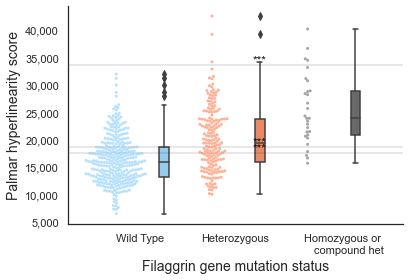

In [367]:
os.chdir("/Users/L/Documents/eczema ML models/")
"""
P0.02 - figure
"""



a = pd.read_csv("palmalldf.csv")
ylab = 'Palmar hyperlinearity score'

ya="Palmar scores"
result01 = "***"
result12 = "***"
result02 = "***"
 
plotbox(a=a, xa="FLG status", ya=ya, ylabel=ylab, s=3, alpha=0.6)
ymax = a[ya].max()
x1, x2 = -1, 3   # columns 'Sat' and 'Sun' (first column: 0, see plt.xticks())
h = 2
col = 'k'

y = 17584
plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=0.2, c=col)
plt.text((x1+x2)*.5, y+h, result01, ha='center', va='bottom', color=col)

y = 18636
plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=0.2, c=col)
plt.text((x1+x2)*.5, y+h, result01, ha='center', va='bottom', color=col)

y = 33610
plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=0.2, c=col)
plt.text((x1+x2)*.5, y+h, result01, ha='center', va='bottom', color=col)

#plt.title('Palmar dataset')
sns.despine()
plt.show()



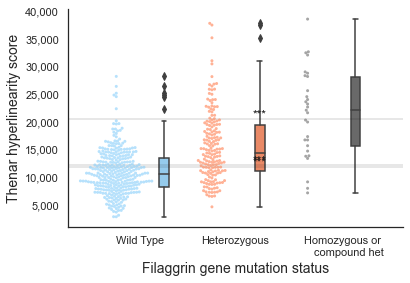

In [368]:
os.chdir("/Users/L/Documents/eczema ML models/")
"""
P0.02 - figure
"""

a = pd.read_csv("thenarscoresalldf.csv")
ylab = 'Thenar hyperlinearity score'

ya="Thenar scores"
result01 = "***"
result12 = "***"
result02 = "***"
 
plotbox(a=a, xa="FLG status", ya=ya, ylabel=ylab, s=3, alpha=0.6)
ymax = a[ya].max()
x1, x2 = -1, 3   # columns 'Sat' and 'Sun' (first column: 0, see plt.xticks())
h = 2
col = 'k'

y = 12214
plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=0.2, c=col)
plt.text((x1+x2)*.5, y+h, result01, ha='center', va='bottom', color=col)

y = 11855
plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=0.2, c=col)
plt.text((x1+x2)*.5, y+h, result01, ha='center', va='bottom', color=col)

y = 20479
plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=0.2, c=col)
plt.text((x1+x2)*.5, y+h, result01, ha='center', va='bottom', color=col)

#plt.title('Palmar dataset')
sns.despine()
plt.show()

